# DBSCAN and DPC Clustering Synthetic Data

- Virginia Ordoño
- May 2024

Aplicar los algoritmos DBSCAN y DPC a los datos sintéticos que se proporcionan. Comparad el resultado obtenido con el real

### 1. Carga de datos

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

# !pip install pydpc
# import pandas as pd

# data3 = '/content/drive/MyDrive/Colab Notebooks/SAA/data/synthetic_data3.csv'
# data3_labels = '/content/drive/MyDrive/Colab Notebooks/SAA/data/synthetic_data3_with_labels.csv'

# df = pd.read_csv(data3)
# df_labelled = pd.read_csv(data3_labels)
# df_labelled["Cluster"].replace(-1, 5, inplace=True) # Para coincidir en la representación visual

# df.T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
X1,1.608417,2.312804,2.676850,-1.238309,-1.936576,-2.126834,-2.492533,-1.503615,2.215694,-2.525449,...,0.056277,4.642643,-2.749310,-0.482160,-1.046648,-1.736828,-1.447760,-1.755699,-1.475253,2.870586
X2,1.685171,-1.243635,-1.740977,0.764010,-2.845153,-1.872938,1.836252,1.971103,-2.284301,2.207413,...,-4.675804,-4.051412,-2.473504,-4.992646,-3.325282,1.711785,-2.798067,3.019623,4.664746,-2.435037


## 1. Carga datos VSC

In [9]:
import pandas as pd # type: ignore

data3  = '../data/synthetic_data3.csv'
data3_labels  = '../data/synthetic_data3.csv'

df = pd.read_csv(data3)
df_labelled = pd.read_csv(data3_labels)

df.T

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
X1,1.608417,2.312804,2.676850,-1.238309,-1.936576,-2.126834,-2.492533,-1.503615,2.215694,-2.525449,...,0.056277,4.642643,-2.749310,-0.482160,-1.046648,-1.736828,-1.447760,-1.755699,-1.475253,2.870586
X2,1.685171,-1.243635,-1.740977,0.764010,-2.845153,-1.872938,1.836252,1.971103,-2.284301,2.207413,...,-4.675804,-4.051412,-2.473504,-4.992646,-3.325282,1.711785,-2.798067,3.019623,4.664746,-2.435037


### 2. Visualización

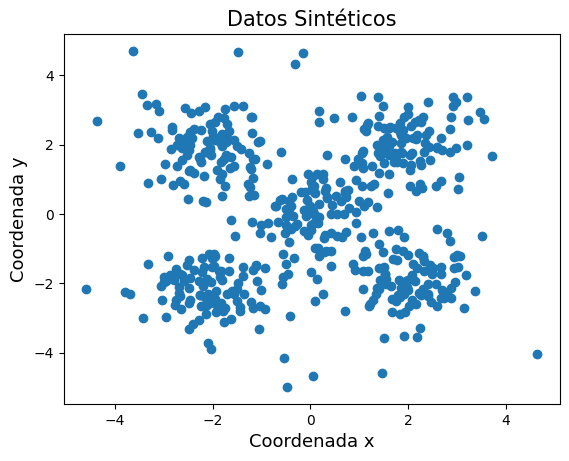

In [26]:
import matplotlib.pyplot as plt  # type: ignore

plt.scatter(df['X1'], df['X2'])
plt.title("Datos Sintéticos", fontsize=15)
plt.xlabel('Coordenada x',  fontsize=13)
plt.ylabel('Coordenada y',  fontsize=13)
plt.show()

## 2. Algoritmo DBSCAN

In [27]:
df_dbscan = df.copy()

### 2.1. Selección de hiperparámetros

In [71]:
from sklearn.cluster import DBSCAN

# Definir una lista de posibles valores de EPSILON y MIN_SAMPLES para probar
possible_eps_values = [0.3, 0.35, 0.36, 0.37, 0.38, 0.39, 0.91, 0.93, 0.95, 0.97, 0.98, 0.99]
possible_min_samples_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for eps in possible_eps_values:
    for min_samples in possible_min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_dbscan)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters == 6:
          print(f"For EPSILON={eps} and MIN_SAMPLES={min_samples}, Number of clusters: {n_clusters}")


For EPSILON=0.3 and MIN_SAMPLES=7, Number of clusters: 6
For EPSILON=0.35 and MIN_SAMPLES=5, Number of clusters: 6
For EPSILON=0.35 and MIN_SAMPLES=8, Number of clusters: 6
For EPSILON=0.36 and MIN_SAMPLES=5, Number of clusters: 6
For EPSILON=0.36 and MIN_SAMPLES=7, Number of clusters: 6
For EPSILON=0.37 and MIN_SAMPLES=5, Number of clusters: 6
For EPSILON=0.37 and MIN_SAMPLES=7, Number of clusters: 6
For EPSILON=0.38 and MIN_SAMPLES=7, Number of clusters: 6
For EPSILON=0.97 and MIN_SAMPLES=1, Number of clusters: 6
For EPSILON=0.98 and MIN_SAMPLES=1, Number of clusters: 6
For EPSILON=0.99 and MIN_SAMPLES=1, Number of clusters: 6


### 2.2. Creación del modelo

In [77]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

BEST_EPSILON = 0.38
BEST_MIN_SAMPLES = 7

dbscan_model = DBSCAN(eps=BEST_EPSILON, min_samples=BEST_MIN_SAMPLES)
groups = dbscan_model.fit_predict(df)

# Contar la cantidad de outliers (puntos con etiqueta -1)
total_outliers = sum(groups == -1)

# Contar el número de etiquetas únicas (clusters) excluyendo los outliers (etiqueta -1)
# Se excluye la etiqueta -1 porque representa outliers
unique_labels = set(groups)
total_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)

print(f"El total de clusters detectados: {total_clusters}")
print(f"La cantidad de outliers detectados por DBSCAN es: {total_outliers}")

El total de clusters detectados: 6
La cantidad de outliers detectados por DBSCAN es: 118


### 2.3. Visualización del modelo vs. Datos etiquetados

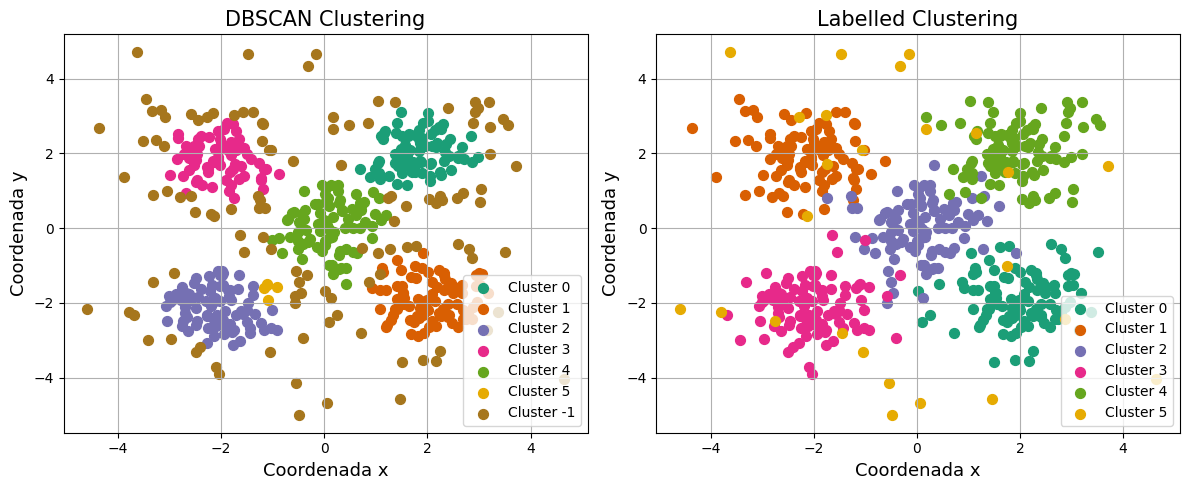

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']

# Gráfico 1. DBSCAN
for i, label_value in enumerate(unique_labels):
    cluster_mask = (groups == label_value)
    ax1.scatter(df_dbscan.loc[cluster_mask, "X1"], df_dbscan.loc[cluster_mask, "X2"], color=colors(i), label=f'Cluster {label_value}', s=50)

ax1.set_title("DBSCAN Clustering", fontsize=15)
ax1.set_xlabel('Coordenada x', fontsize=13)
ax1.set_ylabel('Coordenada y', fontsize=13)
ax1.grid()
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
unique_labels = set(df_labelled.Cluster)

for i, label in enumerate(unique_labels):
    cluster_mask = (df_labelled['Cluster'] == label)
    ax2.scatter(df_labelled.loc[cluster_mask, "X1"], df_labelled.loc[cluster_mask, "X2"], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_title("Labelled Clustering", fontsize=15)
ax2.set_xlabel('Coordenada x', fontsize=13)
ax2.set_ylabel('Coordenada y', fontsize=13)
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

## 3. Algoritmo DPC

In [31]:
df_dpc = df.copy()

### 3.1. Inicialización del algoritmo

- Calcula las densidades y las distancias mínimas entre puntos

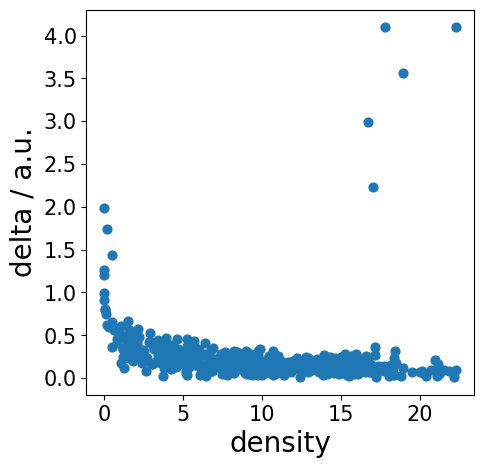

In [32]:
import pydpc
import numpy as np

dpc_numpy = df_dpc.to_numpy()
dpc_cluster = pydpc.Cluster(np.ascontiguousarray(dpc_numpy))

### 3.2. Establecer valores de hiperparámetros para seleccionar los centroides

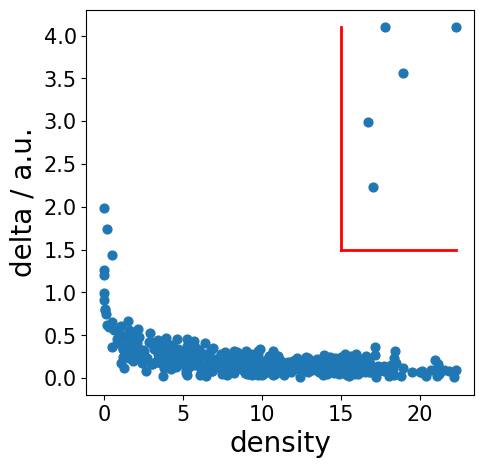

In [33]:
np.bool = bool
RHO = 15
DELTA = 1.5
dpc_cluster.assign(RHO, DELTA)

### 3.3. Visualización del modelo vs. Datos etiquetados

In [34]:
cluster_centers = dpc_cluster.clusters
labels = dpc_cluster.membership


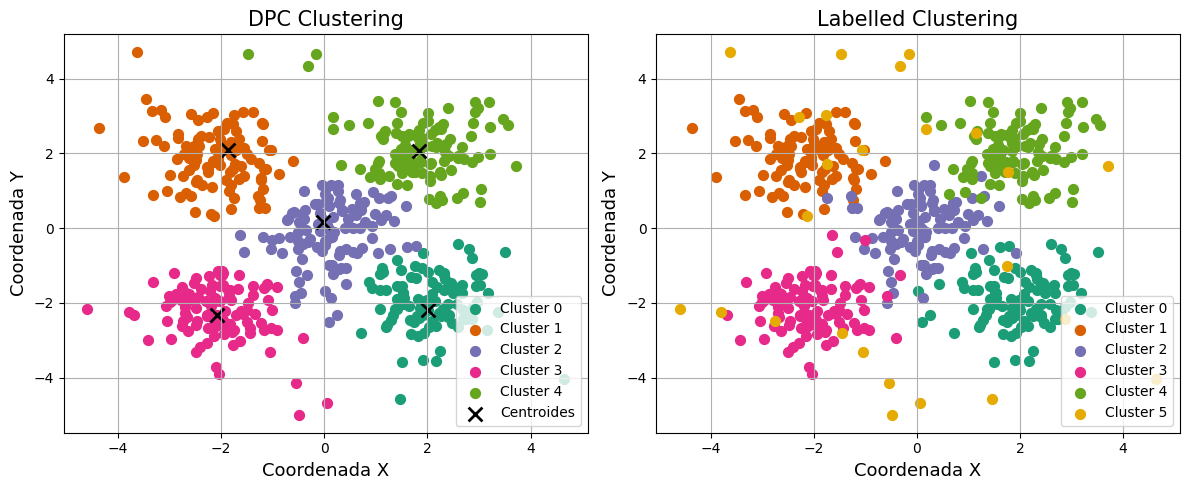

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.cm.Dark2.colors
unique_labels = np.unique(labels)

# Gráfico 1. DPC
for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax1.scatter(dpc_numpy[cluster_mask, 0], dpc_numpy[cluster_mask, 1], color=colors[i], label=f'Cluster {label}', s=50)

# Visualizar centroides
centroid_coordinates = dpc_numpy[cluster_centers]
ax1.scatter(centroid_coordinates[:, 0], centroid_coordinates[:, 1], color='black', marker='x', s=100, linewidths=2, label='Centroides')

ax1.set_title("DPC Clustering", fontsize=15)
ax1.set_xlabel('Coordenada X', fontsize=13)
ax1.set_ylabel('Coordenada Y', fontsize=13)
ax1.grid()
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
unique_labels = set(df_labelled.Cluster)
df_labelled.Cluster = df_labelled.Cluster.replace({0: 4, 1: 3, 2: 0, 3: 1, 4: 2})

# Bucle para asignar un color a cada cluster.
for i, label in enumerate(unique_labels):
    cluster_mask = (df_labelled.Cluster == label)
    ax2.scatter(df_labelled.loc[cluster_mask, "X1"], df_labelled.loc[cluster_mask, "X2"], color=colors[i], label=f'Cluster {label}', s=50)

ax2.set_title("Labelled Clustering", fontsize=15)
ax2.set_xlabel('Coordenada X', fontsize=13)
ax2.set_ylabel('Coordenada Y', fontsize=13)
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()
